# Regression metrics


Regression metrics are used to evaluate the performance of regression models, which are machine learning models that predict continuous numeric values rather than discrete classes. 

As usual, denote dataset $\mathcal D = \{(\boldsymbol x_i, y_i)\}_{i=1}^n$, $y_i \in \mathbb R$, and let $\widehat y_i$ be predictions of some regression model. Regression metrics show how good this predictions are.

## Mean Squared Error (MSE)

MSE calculates the average squared difference between the predicted values and the actual target values. 

$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

MSE gives more weight to large errors compared to smaller errors because it squares the differences between predicted and actual values. This can be advantageous or not depending on the task.

**Advantages of MSE**

* MSE is a smooth metric which makes it suitable for gradient optimization
* Mathematical convenience

**Disadvantages of MSE**

* MSE is highly sensitive to outliers in the data
* MSE is not scale-invariant which hurts interpretability
* The squaring operation in MSE places more emphasis on larger errors


## Root Mean Squared Error (RMSE)


RMSE is the square root of MSE:

$$
\mathrm{RMSE} = \sqrt{\mathrm{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

It provides a measure of the standard deviation of prediction errors and is in the same units as the target variable. Thus, RMSE is more interpretable than MSE.


## Mean Absolute Error (MAE)

MAE calculates the average absolute difference between the predicted values and the actual target values. 

It gives an indication of how far off the predictions are on average.

$$
\mathrm{MAE} = \frac{1}{n} \sum_{i=1}^{n} \vert y_i - \hat{y}_i\vert.
$$

**Advantages of MAE**

* MAE is straightforward to understand and interpret

* MAE is less sensitive to outliers compared to some other metrics like MSE or RMSE

* MAE is scale-invariant, meaning it doesn't change if the units of measurement of the target variable change

**Disadvantages of MAE**

* MAE is not differentiable at zero, which can cause issues when trying to use it in gradient optimization algorithms

* While MAE is less sensitive to outliers than some other metrics, it is not completely immune to their influence; extreme outliers can still have a noticeable impact on MAE

## MAPE

Mean Absolute Percentage Error (MAPE) metric is commonly used to measure the accuracy of forecasts or predictions, especially in time series forecasting and demand forecasting.

$$
\mathrm{MAPE} = \frac 1n\sum_{i=1}^{n} \frac{\vert y_i - \hat{y}_i\vert}{\vert y_i \vert}.
$$

## Simulated example

Take some line and add random noise to it:

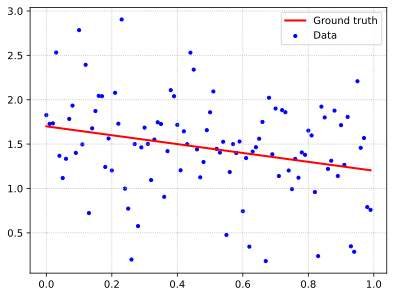

In [24]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

xs = np.linspace(0, 1, num=100, endpoint=False)
a, b = -0.5, 1.7
y = a * xs + b + 0.5*np.random.randn(100)

plt.plot(xs, a * xs + b, c="r", lw=2, label="Ground truth")
plt.scatter(xs, y, c="b", s=10, label="Data")
plt.legend()
plt.grid(ls=":");

Fit linear regression model and check metrics:

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


lin_reg = LinearRegression()
lin_reg.fit(xs[:, None], y)
y_hat = lin_reg.predict(xs[:, None])
print("Bias:", lin_reg.intercept_)
print("Slope:", lin_reg.coef_[0])

# Calculate MAE
mae = mean_absolute_error(y, y_hat)

# Calculate MSE
mse = mean_squared_error(y, y_hat)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(y, y_hat)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean absolute percentage error(MAPE): {mape:.4f}")

Bias: 1.716328947058639
Slope: -0.4970627298293753
Mean Absolute Error (MAE): 0.3856
Mean Squared Error (MSE): 0.2663
Root Mean Squared Error (RMSE): 0.5160
Mean absolute percentage error(MAPE): 0.5123


Now make one point to be an outlier:

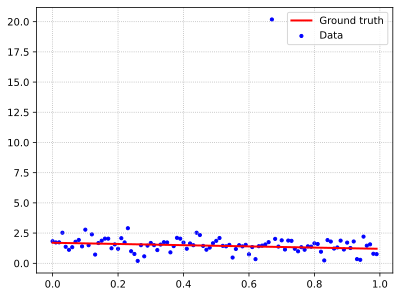

In [26]:
M = 20
y[np.random.randint(len(y))] += M
plt.plot(xs, a * xs + b, c="r", lw=2, label="Ground truth")
plt.scatter(xs, y, c="b", s=10, label="Data")
plt.legend()
plt.grid(ls=":");

Fit linear regression once again:

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(xs[:, None], y)
y_hat = lin_reg.predict(xs[:, None])
print("Bias:", lin_reg.intercept_)
print("Slope:", lin_reg.coef_[0])

Bias: 1.708408154979431
Slope: -0.07702072562895533


Print metrics:

In [28]:
mae = mean_absolute_error(y, y_hat)
mse = mean_squared_error(y, y_hat)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y, y_hat)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean absolute percentage error(MAPE): {mape:.4f}")

Mean Absolute Error (MAE): 0.5964
Mean Squared Error (MSE): 3.7310
Root Mean Squared Error (RMSE): 1.9316
Mean absolute percentage error(MAPE): 0.5533
